In [1]:
from preprocess import Preprocess
from kmeans import KMeansClustering
import logging
logging.getLogger().setLevel(logging.INFO)

In [2]:
data_dev = Preprocess.open_csv("F:\Thesis\data\SemEval\hateval2019_en_dev.csv")
data_train = Preprocess.open_csv("F:\Thesis\data\SemEval\hateval2019_en_train.csv")
HS = '1'
TR = '1'
AG = '0'
filtered_dev = Preprocess.filter_sem_eval(X=data_dev, HS=HS, TR=TR, AG=AG)
filtered_train = Preprocess.filter_sem_eval(X=data_train, HS=HS, TR=TR, AG=AG)
filtered_data = filtered_dev + filtered_train
tweets = [x[1] for x in filtered_data]
cleaned_data = Preprocess.clean(X=tweets)
km = KMeansClustering()
X = km.fit_tfidf(cleaned_data)
X = km.fit_lsa(X)

INFO:root:Original data length: 1000
INFO:root:After applying filters: 110
INFO:root:Data length after removing invalid tweets: 31
INFO:root:Original data length: 9000
INFO:root:After applying filters: 869
INFO:root:Data length after removing invalid tweets: 340
INFO:root:Explained variance of the SVD step: 49%


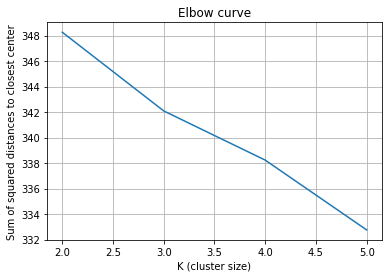

In [3]:
%matplotlib inline
# Lower values are better
km.plot_elbow_curve(max_k=5, X=X)

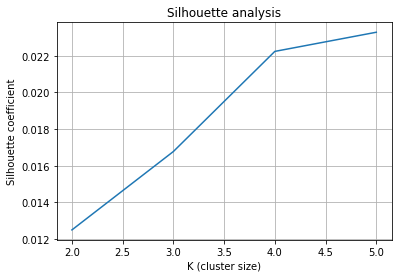

In [4]:
%matplotlib inline
# Higher values are better
km.plot_silhouette_analysis(max_k=5, X=X)

In [5]:
K = 5
km.cluster(X= X, K=K)
km.print_top_terms()

Cluster 0:
 woman hysterical bitch pussy think say got cunt just gonna

Cluster 1:
 bitch like dick don hoes slut girl girlfriend stop want

Cluster 2:
 fucking cunt bitch fuck stupid whore hoe shit like dick

Cluster 3:
 whore ass bitch skank miss boo fuck ugly girlfriend shit

Cluster 4:
 hoe bitch know like ass im pussy just girl stupid



In [6]:
NUM_SAMPLES=5
km.cluster(X= X, K=K)
km.print_most_representative_samples(original_data=filtered_data, X=X, num_samples=NUM_SAMPLES)

Cluster 0: most representative sample indices: [ 20  29 106 192 179]
['18979', 'Most hysterical woman #KavanaughConfirmationHearings #BrettKavanaugh #CoryBooker #KamalaHarris', '1', '1', '0']

['19160', 'I think Booker is a more hysterical woman than Kamala', '1', '1', '0']

['5202', 'Soccer players go down more than my bitch on my dick', '1', '1', '0', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

['5490', 'Gonna be the sexiest Bat Woman in that bitch😈😈😈', '1', '1', '0', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

['5441', 'This girl really think I’m dumb 😂 bitch I know you scam stop DM me about that shit', '1', '1', '0', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']


Cluster 1: most representative sample indices: [ 49 348 191 306 127]
['4793', "Titties are 😎 but where's your ass bitch", '1', '1', '0', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

['8815', 'Your skank ass disgusts me so much'